# Examples 

Below are some examples of how the package could be used in astronomical studies. While there are more use cases, the most common are outlined below.

## AstDyS Catalog

By default, the application uses NASA Horizon database for the initial data. However, there is another option for numbered asteroids — AstDyS catalog. The app will download the latest version, convert it, and start using it in simulation.

In [ ]:
import resonances

sim = resonances.Simulation(name='test_astdys', source='astdys')
sim.create_solar_system()

sim.add_body(463, '4J-2S-1', '463 Lola')

Now, let's run the simulation with AstDyS data. Note that we did not specify the date of the simulation — when using AstDyS, the app will take the date of the AstDyS catalog. It is possible to change this but it is not recommended.

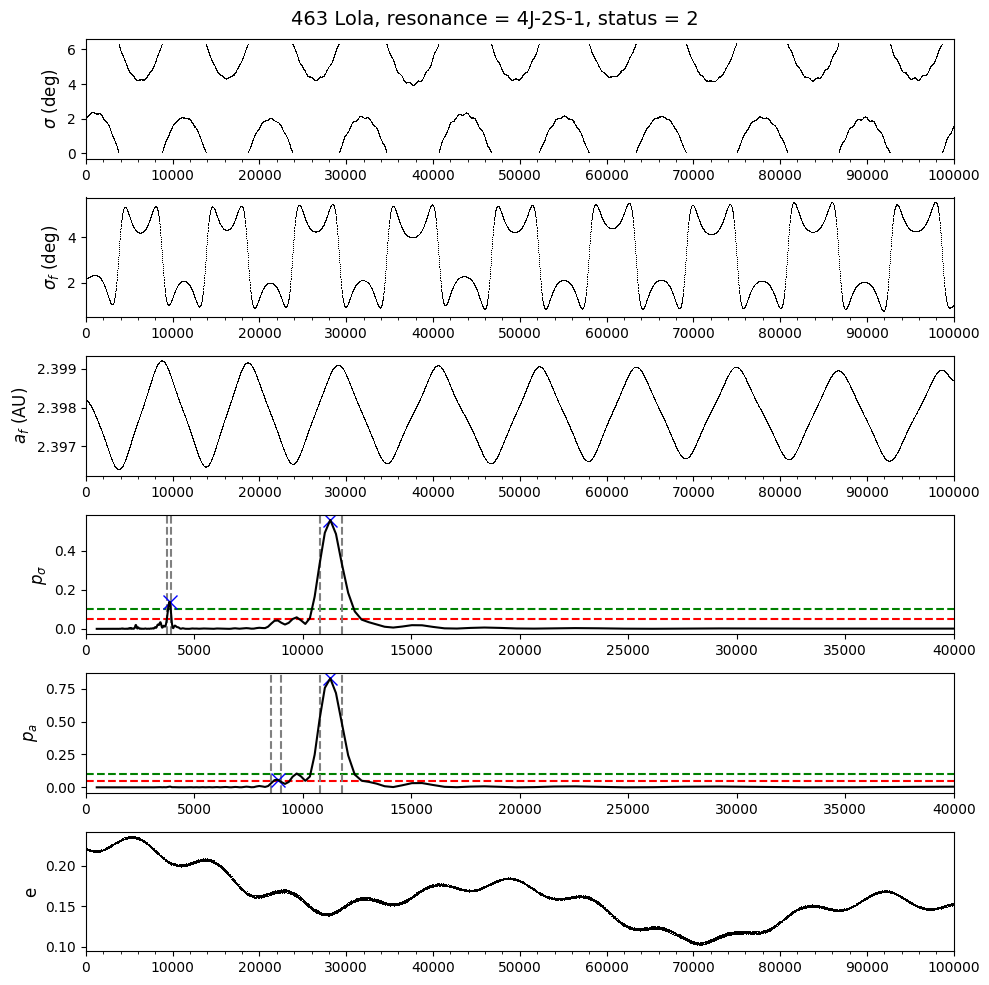

In [3]:
sim.run()

## Configuring the integrator

By default, the package uses `ias15` and adaptive timestamp. However, sometimes, one might want to perform a quick integration using another integrator, i.e., `whfast`. The default functions does not support such a customization. However, it is easy to create a custom simulation and proceed with it.

In [5]:
import resonances

sim = resonances.Simulation(name='test_whfast', date='2025-01-01 00:00', integrator='whfast', dt=0.1)
sim.create_solar_system()
sim.add_body(463, '4J-2S-1', '463 Lola')

Searching NASA Horizons for '463;'... 
Found: 463 Lola (A900 UK) 


/Users/smirik/projects/resonances/.venv/lib/python3.11/site-packages/rebound/horizons.py:172: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


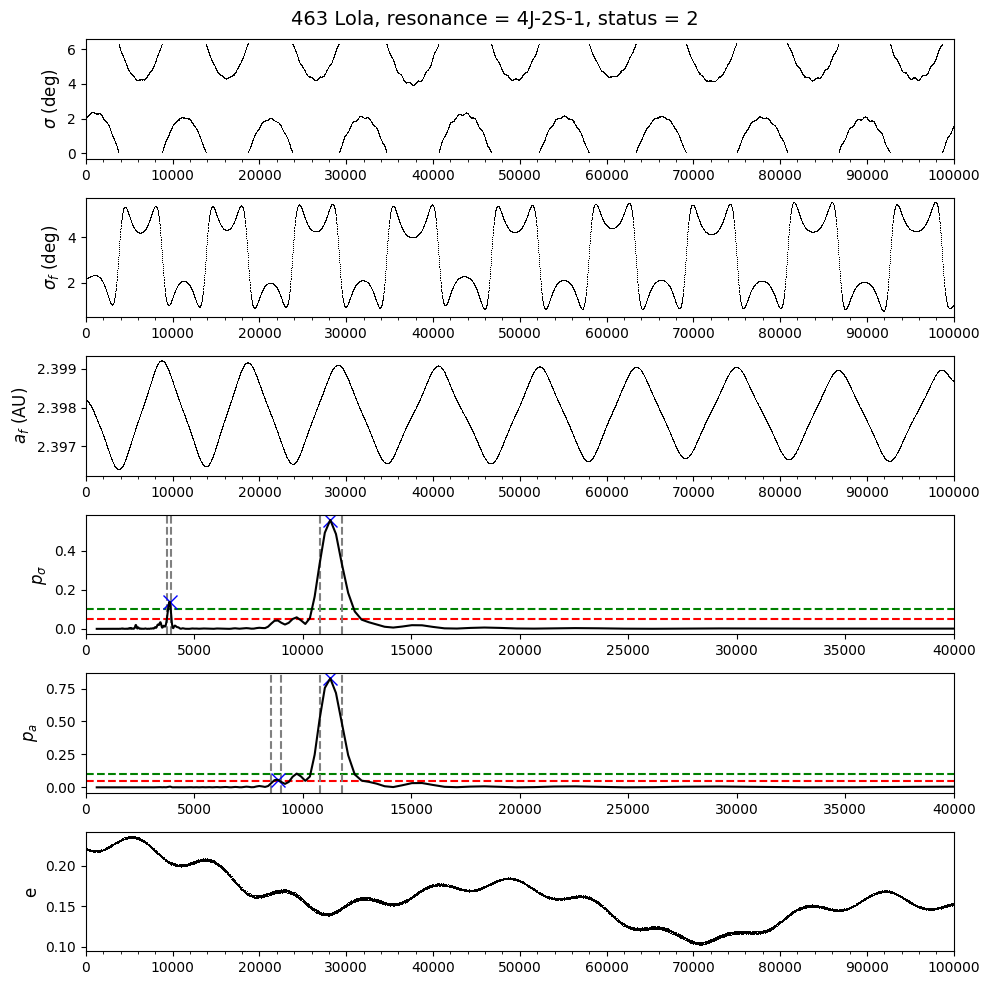

In [6]:
sim.run()

## Find only two-body MMRs near the semimajor axis

In Quick Start, we have seen how to find all MMRs (two-body and three-body) for a given value of semi-major axis through the function `resonances.find_resonances`. However, one might want to find only two-body or three-body resonances. To perform this, there are special classes `ThreeBodyMatrix` and `TwoBodyMatrix` that can be used to find only three-body and two-body resonances, respectively.

In [3]:
from resonances import ThreeBodyMatrix, TwoBodyMatrix

mmrs = TwoBodyMatrix.find_resonances(2.35, sigma=0.1, planets=['Mars', 'Jupiter'])
for mmr in mmrs:
    print(mmr.to_short())

mmrs = ThreeBodyMatrix.find_resonances(2.35, sigma=0.05, planets=['Mars', 'Jupiter', 'Saturn'])
for mmr in mmrs:
    print(mmr.to_short())    

1M-2
1M+2
5M-9
6M-11
7J-2
7J+2
10J-3
1M-3J-1
2M-3J-3
2M+4J-5
3M-2J-5
3M+1J-6
3M+4J-7
4M-2J-7
1M+1S-2
2M+1S-4
3M+1S-6
3M+2S-6
2J+3S-1
4J-2S-1
5J-4S-1
6J+1S-2
7J-1S-2


The code above performs the following:

1. The first `find_resonances` finds two-body MMRs resonances within the range $2.35\pm 0.1 = [2.25, 2.45]$.
1. The second `find_resonances` finds three-body MMRs resonances within the range $2.35\pm 0.05 = [2.3, 2.4]$.

## Find asteroids in a given resonance

One might want to find all asteroids in a given resonance. This can be done by the function `find_asteroids_in_resonance`. It has the following inputs:

- `mmr` (Union[MMR, str]): The mean motion resonance to search for. Can be either an MMR object or a string representation (e.g., "4J-2S-1")
- `sigma` (float, default=0.1): Width parameter for resonance search around the resonant axis
- `per_iteration` (int, default=500): Number of asteroids to process in each batch/chunk for memory efficiency 

The function returns a list of DataFrames containing simulation results for asteroids found in the specified resonance.

This function is time-consuming because it integrates the orbits of all relevant asteroids. One might want to get a list of candidates first based on the closeness of the resonant axis. To do this, we can use `astdys` package.

In [5]:
import astdys, resonances

mmr = resonances.create_mmr('4J-2S-1')
df_asteroids = astdys.search_by_axis(mmr.resonant_axis, sigma=0.01)
print('Number of objects found: {}'.format(len(df_asteroids)))
df_asteroids.head(5)

Number of objects found: 3619


,a,e,inc,Omega,omega,M,epoch
num,,,,,,,
20,2.407925,0.143731,0.012380,3.595020,4.493478,4.962143,60600.0
25,2.400450,0.254243,0.377134,3.736615,1.574323,5.989823,60600.0
60,2.392187,0.184544,0.062843,3.342778,4.725915,0.377345,60600.0
63,2.394722,0.128203,0.100759,5.893842,5.161197,5.439140,60600.0
192,2.402742,0.245596,0.118624,5.988033,0.533790,2.924088,60600.0


The function `search_by_axis` is powerful and can be used to find asteroids by a given value of the semi-major axis for other purposes as well (i.e., to plot some of them).

If one still wants to classify whether any of the asteroids found are really resonant, one can use the function `find_asteroids_in_mmr` described above.

In [35]:
data = resonances.find_asteroids_in_mmr('6J-3S-2', sigma=0.01)

By default, this method also saves output data to `cache/%current_datetime%` subdirectory. You can access the results either through the variable `data` or by reading `summary.csv` file in the proper directory.